**Training Deep Neural Networks**

In this notebook, we will be comparing different activation functions common in the development of Deep Neural Networks 

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0-preview.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Training a deep DNN isn’t a walk in the park. Here are
some of the problems you could run into:
- You may be faced with the tricky vanishing gradients problem or the related exploding gradients problem. This is when the gradients grow smaller and smaller, or larger and larger, when flowing backward through the DNN during training. Both of these problems make lower layers very hard to train.
- You might not have enough training data for such a large network, or it might be too costly to label.
- Training may be extremely slow.
- A model with too many parameters would severely risk overfitting the training set, especially if there are not enough training instances or if they are too noisy.

**Steps to train a deep DNN:**
- Data Preparation
    - Data Collection
    - Data Preprocessing
    - Data Splitting
- Model Definition
    - Choose Architecture
        - FNN: Feedforward Neural Network
        - CNN: Convolutional Neural Network
        - RNN: Recurrent Neural Network
        - Transfer Networks
    - Layer Configuration
        - Dense
        - Convolutional
        - Pooling
        - Recurrent
        - Normalization
        - Activation
- Model Initialization

# Data Preparation

In this notebook we won't be focussing on this part of a deep neural network project and we will be loading an already prepared dataset

Let's train a neural network on Fashion MNIST:

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
print(X_train.shape)

(55000, 28, 28)


# Model Definition & Initialization

## Leaky ReLU

The Leaky ReLU is an activation function that is a variant of the ReLU function
defined as LeakyReLUα(z) = max(αz, z). 

We use this variation instead of the
the ReLU activation function because it suffers from a problem
known as the dying ReLUs: during training, some neurons effectively “die,” meaning
they stop outputting anything other than 0. In some cases, you may find that half of
your network’s neurons are dead, especially if you used a large learning rate. A neuron
dies when its weights get tweaked in such a way that the weighted sum of its
inputs are negative for all instances in the training set. When this happens, it just
keeps outputting zeros, and Gradient Descent does not affect it anymore because the
gradient of the ReLU function is zero when its input is negative.

In [4]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

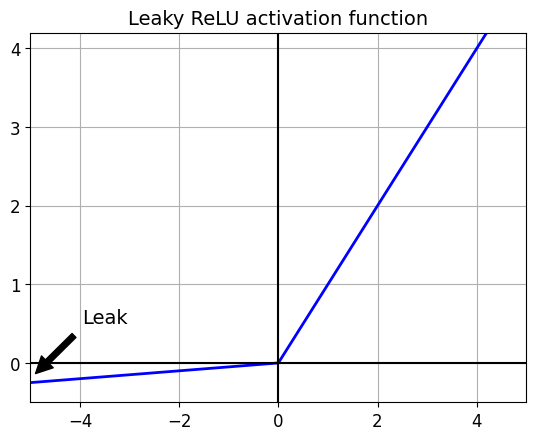

In [5]:
z = np.linspace(-5, 5, 200)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [6]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'leaky_relu',
 'linear',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [7]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [8]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

C:\Users\AJ\antonio_janeiro_venv\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4656 - loss: 1.6859 - val_accuracy: 0.7288 - val_loss: 0.8590
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7361 - loss: 0.8136 - val_accuracy: 0.7778 - val_loss: 0.6933
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.7777 - loss: 0.6810 - val_accuracy: 0.7992 - val_loss: 0.6209
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7957 - loss: 0.6176 - val_accuracy: 0.8132 - val_loss: 0.5781
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8066 - loss: 0.5784 - val_accuracy: 0.8208 - val_loss: 0.5489
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8140 - loss: 0.5513 - val_accuracy: 0.8260 - val_loss: 0.5274
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8205 - loss: 0.5310 - val_accuracy: 0.8284 - val_loss: 0.5108
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8245 - loss: 0.5

## Leaky PreLU

PReLU was reported to strongly outperform ReLU on large image datasets, but
on smaller datasets it runs the risk of overfitting the training set.

Now let's try PReLU:

In [11]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4596 - loss: 1.6724 - val_accuracy: 0.7218 - val_loss: 0.8880
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7324 - loss: 0.8433 - val_accuracy: 0.7782 - val_loss: 0.7042
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7756 - loss: 0.6966 - val_accuracy: 0.8014 - val_loss: 0.6249
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7959 - loss: 0.6268 - val_accuracy: 0.8126 - val_loss: 0.5780
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8076 - loss: 0.5836 - val_accuracy: 0.8228 - val_loss: 0.5462
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8151 - loss: 0.5536 - val_accuracy: 0.8298 - val_loss: 0.5229
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8215 - loss: 0.5311 - val_accuracy: 0.8346 - val_loss: 0.5048
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8264 - loss: 0.

## ELU

Last but not least, a 2015 paper by Djork-Arné Clevert et al.6 proposed a new activation
function called the exponential linear unit (ELU) that outperformed all the ReLU
variants in the authors’ experiments: training time was reduced, and the neural network
performed better on the test set.

The ELU activation function looks a lot like the ReLU function, with a few major
differences:
- It takes on negative values when z < 0, which allows the unit to have an average output closer to 0 and helps alleviate the vanishing gradients problem. The hyperparameter α defines the value that the ELU function approaches when z is a large negative number. It is usually set to 1, but you can tweak it like any other hyperparameter.
- It has a nonzero gradient for z < 0, which avoids the dead neurons problem.
- If α is equal to 1 then the function is smooth everywhere, including around z = 0, which helps speed up Gradient Descent since it does not bounce as much to the left and right of z = 0.

In [14]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

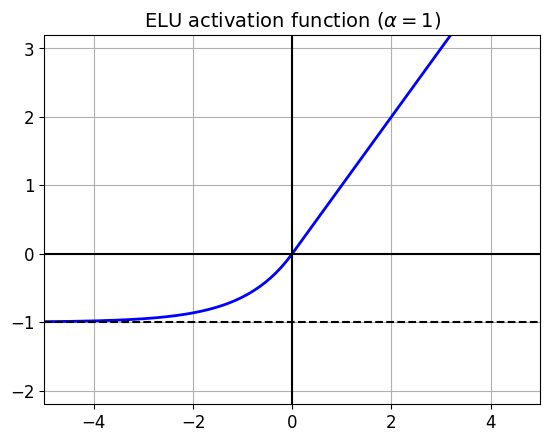

In [15]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

Implementing ELU in TensorFlow is trivial, just specify the activation function when building each layer:

In [16]:
keras.layers.Dense(10, activation="elu")

<Dense name=dense_6, built=False>

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.ELU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.ELU(),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"]
)

In [19]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.5251 - loss: 1.4511 - val_accuracy: 0.7370 - val_loss: 0.7886
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7499 - loss: 0.7577 - val_accuracy: 0.7864 - val_loss: 0.6578
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7857 - loss: 0.6493 - val_accuracy: 0.8032 - val_loss: 0.5968
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8026 - loss: 0.5941 - val_accuracy: 0.8158 - val_loss: 0.5594
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8120 - loss: 0.5588 - val_accuracy: 0.8244 - val_loss: 0.5336
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8191 - loss: 0.5339 - val_accuracy: 0.8298 - val_loss: 0.5145
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8249 - loss: 0.5150 - val_accuracy: 0.8344 - val_loss: 0.4998
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8291 - loss: 0

## SELU

This activation function was proposed in this [great paper](https://arxiv.org/pdf/1706.02515.pdf) by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017. During training, a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. As a result, this activation function outperforms the other activation functions very significantly for such neural nets.

Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ<sub>1</sub> or ℓ<sub>2</sub> regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

In [20]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [21]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

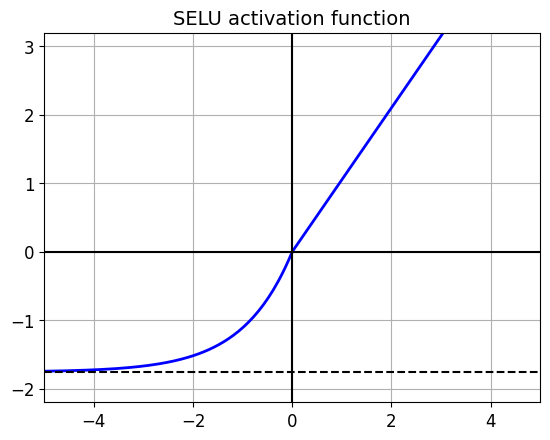

In [22]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])


plt.show()

By default, the SELU hyperparameters (`scale` and `alpha`) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [23]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


Using SELU is easy:

In [24]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

<Dense name=dense_10, built=False>

Let's create a neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function:

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

Now let's train it. Do not forget to scale the inputs to mean 0 and standard deviation 1:

In [28]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [29]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 74s 31ms/step - accuracy: 0.3424 - loss: 1.6989 - val_accuracy: 0.5262 - val_loss: 1.2357
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.5639 - loss: 1.1139 - val_accuracy: 0.6640 - val_loss: 0.8621
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.6656 - loss: 0.8595 - val_accuracy: 0.7404 - val_loss: 0.7149
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.7081 - loss: 0.7801 - val_accuracy: 0.7128 - val_loss: 0.7337
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.7672 - loss: 0.6331 - val_accuracy: 0.7342 - val_loss: 0.6543


Now look at what happens if we try to use the ReLU activation function instead:

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [33]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 69s 29ms/step - accuracy: 0.1477 - loss: 2.2045 - val_accuracy: 0.3434 - val_loss: 1.7390
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.3538 - loss: 1.6032 - val_accuracy: 0.4708 - val_loss: 1.3677
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.5229 - loss: 1.1936 - val_accuracy: 0.3960 - val_loss: 1.5696
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.6098 - loss: 0.9858 - val_accuracy: 0.7218 - val_loss: 0.7911
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.6579 - loss: 0.8921 - val_accuracy: 0.4436 - val_loss: 1.3420


Not great at all, we suffered from the vanishing/exploding gradients problem.

# Batch Normalization

Although using He initialization along with ELU (or any variant of ReLU) can significantly
reduce the danger of the vanishing/exploding gradients problems at the beginning
of training, it doesn’t guarantee that they won’t come back during training.

In a 2015 paper, Sergey Ioffe and Christian Szegedy proposed a technique called
Batch Normalization (BN) that addresses these problems. The technique consists of
adding an operation in the model just before or after the activation function of each
hidden layer. This operation simply zero-centers and normalizes each input, then
scales and shifts the result using two new parameter vectors per layer: one for scaling,
the other for shifting. In other words, the operation lets the model learn the optimal
scale and mean of each of the layer’s inputs. In many cases, if you add a BN layer as
the very first layer of your neural network, you do not need to standardize your training
set (e.g., using a StandardScaler); the BN layer will do it for you (well, approximately,
since it only looks at one batch at a time, and it can also rescale and shift each
input feature).
In order to zero-center and normalize the inputs, the algorithm needs to estimate
each input’s mean and standard deviation. It does so by evaluating the mean and standard
deviation of the input over the current mini-batch (hence the name “Batch Normalization”).

In [34]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [36]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6170 - loss: 1.1556 - val_accuracy: 0.8142 - val_loss: 0.5482
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7948 - loss: 0.5962 - val_accuracy: 0.8364 - val_loss: 0.4730
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8208 - loss: 0.5213 - val_accuracy: 0.8494 - val_loss: 0.4386
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8331 - loss: 0.4809 - val_accuracy: 0.8588 - val_loss: 0.4174
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8432 - loss: 0.4532 - val_accuracy: 0.8620 - val_loss: 0.4027
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8505 - loss: 0.4323 - val_accuracy: 0.8670 - val_loss: 0.3916
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8559 - loss: 0.4154 - val_accuracy: 0.8680 - val_loss: 0.3827
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8606 - loss: 0

Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

In [37]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [39]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5985 - loss: 1.2087 - val_accuracy: 0.8176 - val_loss: 0.5501
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7963 - loss: 0.5939 - val_accuracy: 0.8334 - val_loss: 0.4756
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8197 - loss: 0.5202 - val_accuracy: 0.8458 - val_loss: 0.4410
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8332 - loss: 0.4810 - val_accuracy: 0.8538 - val_loss: 0.4202
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8422 - loss: 0.4544 - val_accuracy: 0.8594 - val_loss: 0.4055
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8492 - loss: 0.4342 - val_accuracy: 0.8638 - val_loss: 0.3943
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8547 - loss: 0.4179 - val_accuracy: 0.8682 - val_loss: 0.3855
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8601 - loss: 0